# Recap: Caesar Cipher

Let start with some general notes:

- This encryption isn’t limited to lowercase letters; it assumes non\-letter characters are included
- The order of characters matters due to their inclusion.   
- The algorithm works only if you define your own character set.   
- Alternatively, decryption requires the text to be encrypted with the predefined set.

So first, define a set of letters and characters for the function to shift left by N positions until it covers all of them. Here, there are two "alphabet" variables: one from the first practice class and another with capitals and punctuation.  Uncomment the one you want to use.  


In [108]:
alphabet = "abcdefghijklmnopqrstuvwxyz, "
#alphabet = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz,;?!-' "

In [109]:
def indexOfLetter(char):
    return alphabet.find(char)
def letterWithIndex(i):
    return alphabet[i]

In [110]:
def shiftChar(c, shift):
    i = indexOfLetter(c)
    new = (i + shift) % 28
    return letterWithIndex(new)

def caesar(plain, shiftNumber):
    cipher = ""
    for c in plain:
        cipher += shiftChar(c, shiftNumber)
    return cipher
    

# Breaking Caesar by Brute force Attack



In [111]:
def caesar_breaking_v1(cipher):
    for i in range(0, len(alphabet)):
        print("".join(shiftChar(c, -i) for c in cipher))

In [112]:
# Test your code
caesar_breaking_v1('ugetgv')
# key = 2, m = 'secret'

ugetgv
tfdsfu
secret
rdbqds
qcapcr
pb obq
oa,nap
n zm o
m,yl,n
lzxkzm
kywjyl
jxvixk
iwuhwj
hvtgvi
gusfuh
ftretg
esqdsf
drpcre
cqobqd
bpnapc
aom ob
 nl,na
,mkzm 
zljyl,
ykixkz
xjhwjy
wigvix
vhfuhw


### Filter the possible plaintext based on a dictionary

To break a Caesar cipher using a dictionary, follow these steps:

1. **Generate Possible Plaintexts**:Try all possible shifts to decrypt the ciphertext.
2. **Compare with a Dictionary**: Check each decrypted text against the predefined dictionary of valid words \(common\_words.txt\).
3. **Filter Meaningful Results**: Discard outputs that is not in the dictionary words, keeping only plausible plaintexts.



In [113]:
def caesar_breaking_v2(cipher):
    f = open("common_words.txt", "r")
    cw = f.read()
    cw = cw.split("\n")
    for i,_ in enumerate(alphabet):
        if ("".join((shiftChar(c, -i) for c in cipher)) in cw):
            print('m=',"".join((shiftChar(c, -i) for c in cipher)), ',key=', i)
    # Now, similar to the previous one, BUT, return only if the word is among the common English words

In [114]:
# This time, it should return only one plaintext
caesar_breaking_v2('ugetgv')

m= secret ,key= 2


# Breaking Caesar by Frequency Analysis

Lets analyze and print the frequency of letters in a given text. 

The following function uses \`Counter\` from the \`collections\` module to count occurrences of each character. The characters are then sorted by frequency in descending order. Finally, it loops through the sorted characters and prints only the alphabetic ones along with their counts.



In [115]:
from collections import Counter
def text_to_frequency(text):
    L={}
    frequency = Counter(text)
    frequency_sorted = sorted(frequency, key=frequency.get, reverse=True)
    for char in frequency_sorted:
        if char.isalpha():
            L[char] = frequency[char]
    return L

In [116]:
import matplotlib.pyplot as plt

def plot_histogram(dictionary):
    sorted_items = sorted(dictionary.items(), key=lambda item: item[1], reverse=True)
    keys = [item[0] for item in sorted_items]
    values = [item[1] for item in sorted_items]

    plt.bar(keys, values)
    plt.xlabel('Letters')
    plt.ylabel('Number of appearances')
    plt.title('Histogram of the Letters')
    plt.show()

Now, it is your turn. 

Use the previous function to analyse the letter frequency in the crypto.txt file. 


In [117]:
#Read a definition from a file
pathurl = "crypto.txt"
f = open(pathurl, "r")
cryptography_definition = f.read().replace(" ", "")
# we used .replace(" ", "") to remove the spaces, to focus only on the alphabet

In [118]:
text_to_frequency(cryptography_definition)

{'e': 275,
 't': 205,
 'a': 194,
 'i': 191,
 'r': 176,
 'o': 175,
 'n': 166,
 's': 147,
 'c': 128,
 'p': 89,
 'h': 86,
 'l': 85,
 'd': 85,
 'm': 74,
 'y': 67,
 'g': 59,
 'u': 58,
 'f': 40,
 'v': 27,
 'b': 26,
 'w': 17,
 'k': 6,
 'q': 3,
 'x': 3,
 'z': 2,
 'j': 2}

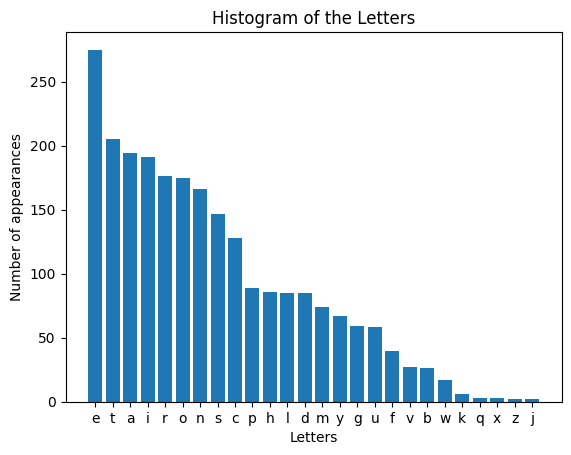

In [119]:
plot_histogram(text_to_frequency(cryptography_definition))

Lets encrypt the text using Caesar cipher, and see the frequencies. 



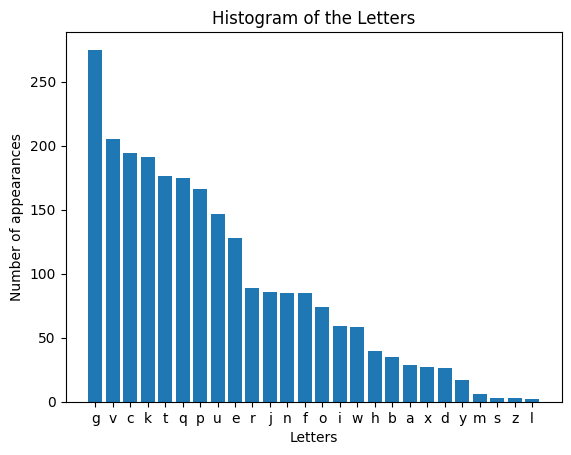

In [120]:
# Here, encrypt the plaintext (cryptography definition) and plot the histogram. What you see ?

plot_histogram(text_to_frequency( caesar(cryptography_definition, 2)))

Now, perform an attack against Caesar cipher, by mapping the ciphertext frequencies to the English letter frequencies. You may use the following letter frequencies of the English letters. 


In [121]:
def frequency_analysis_v0(cipher, english_text):
    l_cipher = next(iter(text_to_frequency(cipher)))        # most frequent letter in cipher
    l_english = next(iter(text_to_frequency(english_text))) # most frequent letter in English
    mapping = abs( ord(l_cipher) - ord(l_english))
    return mapping

In [122]:
pt = frequency_analysis_v0(caesar(cryptography_definition, 2), cryptography_definition)
pt

2

Although you may continue the class with the previous functions, but for more realistic analysis, we need to replace the above one with scoring based frequency analysis. 

#### Scoring based Frequency Analysis

We can analyze letter frequency to determine how close a text is to English. By comparing expected and actual letter frequencies, we assign a score—the lower the score, the more likely it is real English. This helps in decoding ciphertexts by finding the most natural\-looking plaintext.

- Calculate letter frequencies in the given text.
- Compare them to expected English letter frequencies.
- Lower score = more likely to be real English.

Calculate score by summing differences between expected and actual letter frequencies. Example: If 'e' should be 12.8% but is 11.9%, the difference is 0.9%.

- Sum the differences for all letters. 
- Normalize by dividing by the size of the alphabet
- Generate all possible plaintexts from the cipher.
- Score each one and choose the lowest\-scoring text as the most likely original.



In [ ]:
#letter frequency in english alphbet
Lf = {'a': 0.0816700000000000, 'b': 0.0149200000000000, 'c': 0.0278200000000000, 'd': 0.0425300000000000, 'e': 0.127020000000000, 'f': 0.0222800000000000, 'g': 0.0201500000000000, 'h': 0.0609400000000000, 'i': 0.0696600000000000, 'j': 0.00153000000000000, 'k': 0.00772000000000000, 'l': 0.0402500000000000, 'm': 0.0240600000000000, 'n': 0.0674900000000000, 'o': 0.0750700000000000, 'p': 0.0192900000000000, 'q': 0.000950000000000000, 'r': 0.0598700000000000, 's': 0.0632700000000000, 't': 0.0905600000000000, 'u': 0.0275800000000000, 'v': 0.00978000000000000, 'w': 0.0236000000000000, 'x': 0.00150000000000000, 'y': 0.0197400000000000, 'z': 0.000740000000000000}

def frequency_analysis(cipher: str) -> int:
    # Initialize a dictionary to store the frequency of each letter in the ciphertext
    cipher_freq = {letter: 0 for letter in Lf}
    
    # Count the frequency of each letter in the ciphertext
    total_letters = 0
    for char in cipher.lower():
        if char in cipher_freq:
            cipher_freq[char] += 1
            total_letters += 1
    
    # Calculate the actual frequency of each letter in the ciphertext
    for letter in cipher_freq:
        cipher_freq[letter] /= total_letters
    
    # Calculate the score by summing the absolute differences between expected and actual frequencies
    score = 0.0
    for letter in Lf:
        score += abs(Lf[letter] - cipher_freq[letter])
    
    score /= len(Lf.values())

    # generate all possible plaintext and return the one with the lowest score
    
    return score


In [172]:
frequency_analysis(caesar(cryptography_definition, 2))


et,rvqitcrj,aqtet,rvqnqi,kuvjgrtcevkegcpfuvwf,qhvgejpkswguhqtugewtgeqoowpkecvkqpkpvjgrtgugpegqhcfxgtuctkcndgjcxkqtboqtgigpgtcnn,aet,rvqitcrj,kucdqwveqpuvtwevkpicpfcpcn, kpirtqvqeqnuvjcvrtgxgpvvjktfrctvkguqtvjgrwdnkehtqotgcfkpirtkxcvgoguucigubxctkqwucurgevukpkphqtocvkqpugewtkv,uwejcufcvceqphkfgpvkcnkv,afcvckpvgitkv,acwvjgpvkecvkqpacpfpqpbtgrwfkcvkqpctgegpvtcnvqoqfgtpet,rvqitcrj,boqfgtpet,rvqitcrj,gzkuvucvvjgkpvgtugevkqpqhvjgfkuekrnkpguqhocvjgocvkeuaeqorwvgtuekgpegagngevtkecngpikpggtkpiaeqoowpkecvkqpuekgpegacpfrj,ukeubcrrnkecvkqpuqhet,rvqitcrj,kpenwfggngevtqpkeeqoogtegaejkrbdcugfrc,ogpvectfuafkikvcnewttgpekguaeqorwvgtrcuuyqtfuacpfoknkvct,eqoowpkecvkqpubet,rvqitcrj,rtkqtvqvjgoqfgtpcigycughhgevkxgn,u,pqp,oqwuykvjgpet,rvkqpaeqpxgtvkpikphqtocvkqphtqoctgcfcdnguvcvgvqwpkpvgnnkikdngpqpugpugbvjgugpfgtqhcpgpet,rvgfoguucigujctguvjgfgeqfkpivgejpkswgqpn,ykvjkpvgpfgftgekrkgpvuvqrtgenwfgceeguuhtqocfxgtuctkgubvjget,rvqitcrj,nkvgtcvwtgqhvgpwuguvjgpcogucnkegbcbhqtvjgugpfgtadqdbdbhqtvjgkpvgpfgftgekrkgpvac

0.03954472765160082

# Breaking Vigenere

To break \(or decode\) a Vigenere\-encrypted message, we follow these steps:

1. **Find repeating patterns in the text**
   - When the same word or letter group appears more than once, it can give us clues about the length of the secret key.
   - These repetitions happen because the key is used over and over again.
2. **Find Out the Length of the Shift List \(Key Length\)**
   - By checking how far apart the repeated patterns are, we can guess the length of the secret key.
   - This helps because once we know the key length, the problem becomes similar to solving multiple Caesar ciphers.
3. **Guess the letter shifts using common English words and letter frequencies**
   - At this stage, we are solving multiple Caesar ciphers. 
   - As saw earlier, in English, some letters \(like 'E' and 'T'\) appear more often than others.
   - By comparing the encrypted text to normal English letter patterns, we can figure out how each letter was shifted.
   - Once we find the shifts, we can figure out the original key and use it to decode the whole message.



In [124]:
# Write the Vigenere code here :
def vigenere(m, keyList):
    cipher = ""
    for i, c in enumerate(m):
        cipher += shiftChar(c, keyList[i % len(keyList)])
    return cipher
    

### Find repeating patterns in the text



In [125]:
#Output --> [(0, 31), (0, 45), (3, 20), (4, 21), (5, 22), (6, 23), (9, 48), (12, 38), (13, 24), (13, 39), (14, 40), (16, 49), (24, 39), (31, 45)]
def repetitionsInString(s, length = 3):
    L = []
    for i in range(len(s) - length):
        for j in range(i + 1, len(s) - length + 1):
            if s[i:i+length] == s[j:j+length]:
                L.append((i, j))
    return L

In [126]:
# Example to check
s = "ABCrandomskjsomekjdhrandomehkhkABChsadsomekahABCskjda"
repetitionsInString(s)
#Output --> [(0, 31), (0, 45), (3, 20), (4, 21), (5, 22), (6, 23), (9, 48), (12, 38), (13, 24), (13, 39), (14, 40), (16, 49), (24, 39), (31, 45)]

[(0, 31),
 (0, 45),
 (3, 20),
 (4, 21),
 (5, 22),
 (6, 23),
 (9, 48),
 (12, 38),
 (13, 24),
 (13, 39),
 (14, 40),
 (16, 49),
 (24, 39),
 (31, 45)]

### Find Out the Length of the Shift List \(Key Length\)

- To find the key length, first look for repeated letter groups in the encrypted text and note their positions as we did in stage one.
- Then, we calculate the differences between these positions \(e.g., if a pattern appears at positions i and j, compute j \- i\). 
- The key length is likely a factor of these differences, so find the greatest common divisor \(GCD\) of all the differences. 
- This GCD is our best guess for the key length.



In [127]:
from math import gcd
from functools import reduce
def guessedKeyLength(ciphertext, length = 3):
    differences = [j-i for (i,j) in repetitionsInString(ciphertext, length)]
    return reduce(gcd, differences)

In [132]:
m = "encryption keeps sensitive elements secure, defense relies on effective measures to prevent breaches, secrets need proper protection to ensure resilience,"
c = vigenere(m, [4, 3])
c

'iqguasxlsqdnihtvdviqwlxlzhdhphqhrwwcwhgxvhcchhjhrvicvhplivdrrciijhgwmyicqhevyuivdwsctuiyiqxcfuidgkivccwhguiwwcrhigdsvrthvctuswifxlsqdwsciqwxvhduivmomhrfib'

In [133]:
guessedKeyLength(c)

2

### Guess the letter shifts using common English words and letter frequencies

Once we know the length of the key \(shift list\), we need to figure out how much each letter in the key shifts the text. This step is tricky, but it’s not really about complicated cryptography. Instead, we use what we know about the English language.

First, we break the text into groups.Since we now have a guess for the key length \(let’s say K\), we treat the encrypted text as K separate Caesar ciphers.

For example, if the key length is 3, then:

- The 1st, 4th, 7th, etc., letters were all shifted by the first shift in the key.
- The 2nd, 5th, 8th, etc., letters were shifted by the second shift in the key.
- The 3rd, 6th, 9th, etc., letters were shifted by the third shift in the key.

The rest is similar to breaking the Caesar cipher using frequency attack. Finally, Once we find the shifts for each letter group, we now know the key. For example, if we find that the shifts are 5, 7, and 10, that means the secret key used to encrypt the text was probably a word where the letters shifted by 5, 7, and 10.


In [169]:
def break_vigenere(c):
    #Using th previous two functions, create sets of ciphertexts, and implement frequency attack on each single one of them. 

    keyLength = guessedKeyLength(c)
    sets = ["" for _ in range(keyLength)]
    for i, char in enumerate(c):
        sets[i % keyLength] += char
    key = []
    for s in sets:
        key.append(frequency_analysis(s))
    return key


In [170]:
enc_K=[3, 5]

c = vigenere(m, enc_K)
dec_K =[-3, -5]
pt = vigenere(c,dec_K)

cracked_pt = break_vigenere(c)
# assert(cracked_pt==pt)
cracked_pt

[0.04108435222672065, 0.04158397435897436]